# Psych 45: Stroop stats

In [14]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', context='poster', font_scale=1.5)

## Import data file

In [3]:
data = pd.read_csv('http://web.stanford.edu/class/psych45/demos/psych45_stroop_stats.csv')
data.drop(['download', 'when'], axis=1, inplace=True)

data.time_normal = data.time_normal.str.strip(' ms').str.replace(',', '').astype(float)
data.time_interfere = data.time_interfere.str.strip(' ms').str.replace(',', '').astype(float)

data['time_diff'] = data.time_interfere - data.time_normal

#### Remove outliers

In [4]:
max_rt = data.time_interfere.mean() + 2*data.time_interfere.std()
data = data.loc[data.time_interfere < max_rt]

In [5]:
data.head()

,percent_corr,time_normal,time_interfere,time_diff
0,100.00,720.77,1059.39,338.62
1,100.00,669.19,763.22,94.03
2,100.00,979.30,1074.80,95.50
3,90.91,860.58,1050.47,189.89
4,95.65,1133.63,1526.02,392.39


## Analyses

#### Summary stats

In [6]:
data.describe()

,percent_corr,time_normal,time_interfere,time_diff
count,159.000000,159.000000,159.000000,159.000000
mean,95.428491,898.021132,1119.045535,221.024403
std,4.917324,225.461851,240.071177,167.769385
min,72.730000,523.940000,687.410000,-405.660000
25%,93.000000,740.840000,958.335000,132.550000
50%,95.650000,850.300000,1071.250000,205.490000
75%,100.000000,1016.530000,1271.510000,300.460000
max,100.000000,1853.240000,1829.420000,964.910000


### What is the distribution of overall accuracy?

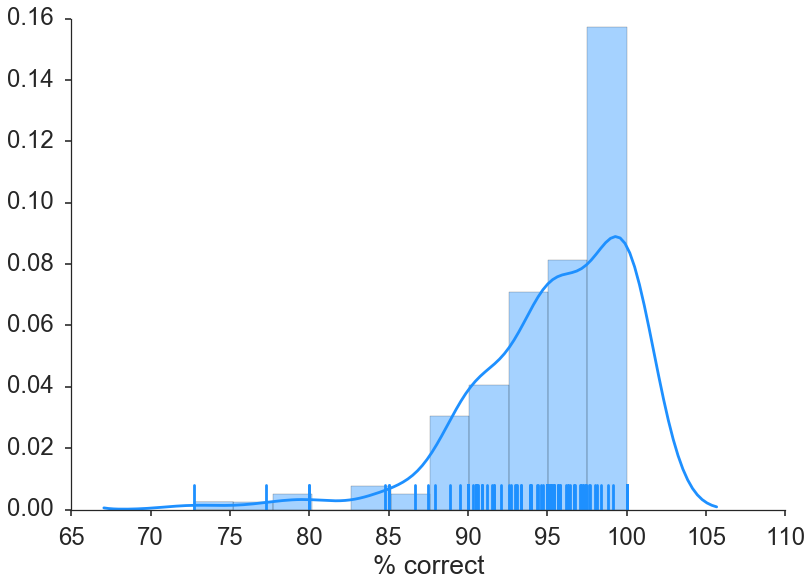

In [7]:
g = sns.distplot(data.percent_corr, rug=True,
                 color='dodgerblue')
g.set_xlabel('% correct')
sns.despine(trim=True)

### How does condition affect response time?

In [8]:
data_long = pd.melt(data, ['percent_corr'])
data_long = data_long.loc[data_long.variable.isin(['time_normal', 'time_interfere'])]
data_long.loc[data_long.variable == 'time_normal', 'variable'] = 'congruent'
data_long.loc[data_long.variable == 'time_interfere', 'variable'] = 'incongruent'

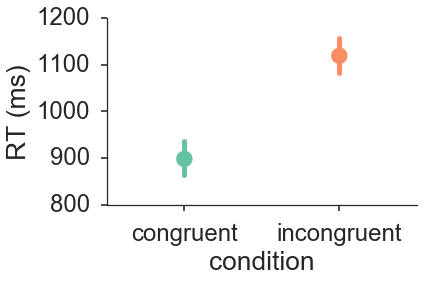

In [15]:
g = sns.factorplot(x='variable', y='value', 
                   aspect=1.5, ci=95,
                   data=data_long, palette='Set2')
g.set_ylabels('RT (ms)')
g.set_xlabels('condition')
plt.locator_params(nbins=5)

### What is the distribution of RTs for incongruent vs. congruent trials?

How much *longer* does it take to respond to an incongruent vs. a congruent trial?

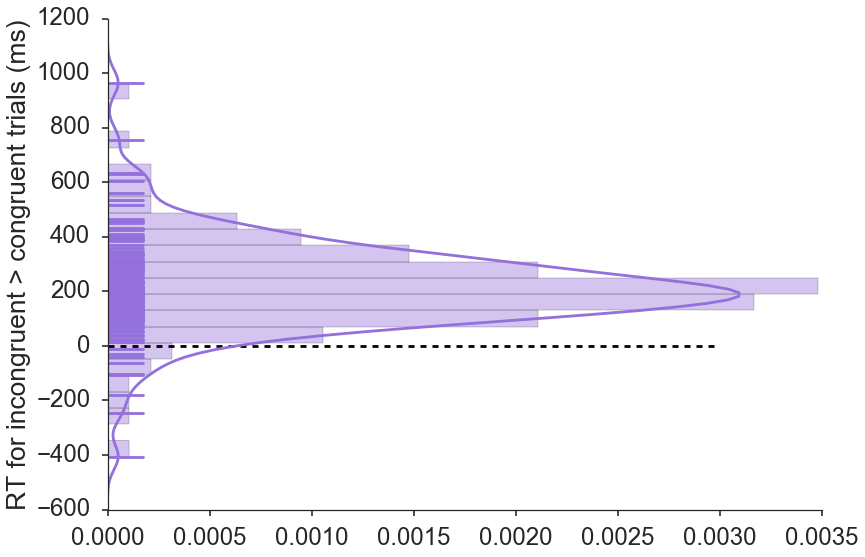

In [11]:
g = sns.distplot(data.time_diff, rug=True, 
                 color='mediumpurple', vertical=True)
g.set_ylabel('RT for incongruent > congruent trials (ms)')
g.hlines(0, 0, .003, linestyles='dashed')
sns.despine(trim=True)